## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [129]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [130]:
a=-1
b=2
X_data= np.linspace(0,20)
Y_data=a*X_data+b

#### Plot your data points. 

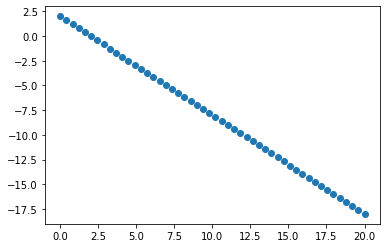

In [131]:
plt.scatter(X_data,Y_data)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

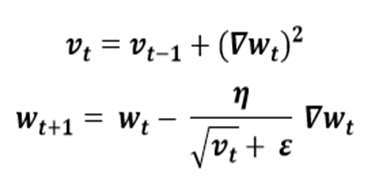

In [132]:
def Adagrad(X,Y,alpha,epsilon,epochs,eps):
    theta0=0
    theta1=0
    cost=[]
    th0=[]
    th1=[]
    gr1=[]
    gr2=[]
    allpredictions=[]
    v_0=0
    v_1=0
   
    for i in range(iters):
        th0.append(theta0)
        th1.append(theta1)
        yper=theta0+theta1*X
        allpredictions.append(yper)
        t=np.sum(np.power(yper-Y,2))/2*len(X)
        cost.append(t)
        g1=np.sum(yper-Y)/len(X)
        g2=np.sum((yper-Y)*X)/len(X)
        v_0+=g1**2
        v_1+=g2**2
        gr1.append(g1)
        gr2.append(g2)
        theta0=theta0-(alpha/(np.sqrt(v_0+epsilon)))*g1
        theta1=theta1-(alpha/(np.sqrt(v_1+epsilon)))*g2
        
    return th0,th1,cost,allpredictions

         

In [133]:
alpha=.2
iters=5000
e=1e-8
theta_0,theta_1,costs,predictions=Adagrad(X_data,Y_data,alpha,e,iters,1e-3)


In [134]:
r2_score(Y_data,predictions[-1])

0.9999999999999999

In [135]:
predictions[-1]

array([  1.99999986,   1.5918366 ,   1.18367334,   0.77551008,
         0.36734682,  -0.04081644,  -0.4489797 ,  -0.85714297,
        -1.26530623,  -1.67346949,  -2.08163275,  -2.48979601,
        -2.89795927,  -3.30612253,  -3.71428579,  -4.12244905,
        -4.53061231,  -4.93877558,  -5.34693884,  -5.7551021 ,
        -6.16326536,  -6.57142862,  -6.97959188,  -7.38775514,
        -7.7959184 ,  -8.20408166,  -8.61224492,  -9.02040819,
        -9.42857145,  -9.83673471, -10.24489797, -10.65306123,
       -11.06122449, -11.46938775, -11.87755101, -12.28571427,
       -12.69387753, -13.1020408 , -13.51020406, -13.91836732,
       -14.32653058, -14.73469384, -15.1428571 , -15.55102036,
       -15.95918362, -16.36734688, -16.77551015, -17.18367341,
       -17.59183667, -17.99999993])

(5000,)
(5000,)


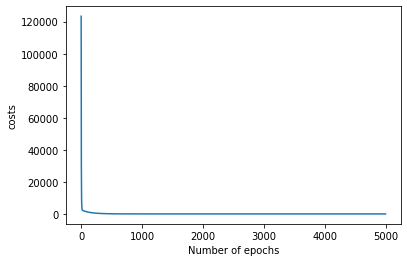

In [136]:
epochs = range(0,len(costs))
print(np.shape(epochs))
print(np.shape(costs))
plt.xlabel("Number of epochs")
plt.ylabel("costs")
plt.plot(epochs,costs)
plt.show()

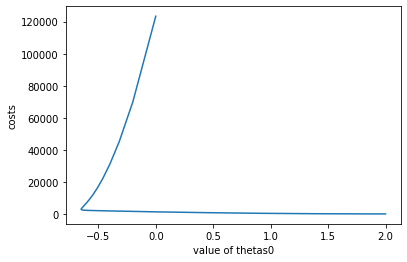

In [137]:
plt.plot(theta_0,costs)
plt.xlabel("value of thetas0")
plt.ylabel("costs")
plt.show()

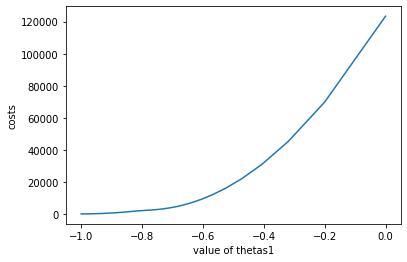

In [138]:
plt.plot(theta_1,costs)
plt.xlabel("value of thetas1")
plt.ylabel("costs")
plt.show()

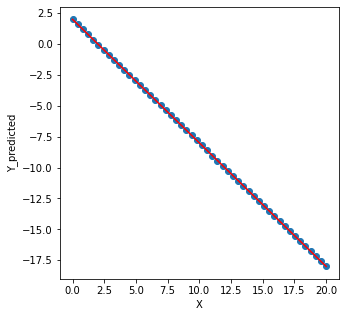

In [139]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X_data,predictions[-1] , 'r')
plt.xlabel('X')
plt.ylabel('Y_predicted')
plt.scatter(X_data,Y_data)
plt.show()


## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

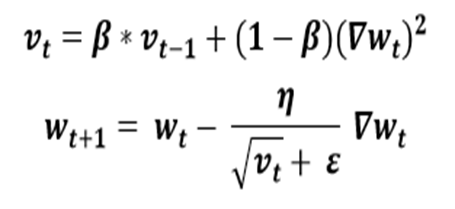

In [140]:
def RMSProp(X,Y,alpha,epsilon,beta,epochs,eps):
    theta0=0
    theta1=0
    cost=[]
    th0=[]
    th1=[]
    gr1=[]
    gr2=[]
    allpredictions=[]
    v_0=0
    v_1=0
   
    for i in range(iters):
        th0.append(theta0)
        th1.append(theta1)
        yper=theta0+theta1*X
        allpredictions.append(yper)
        t=np.sum(np.power(yper-Y,2))/2*len(X)
        cost.append(t)
        g1=np.sum(yper-Y)/len(X)
        g2=np.sum((yper-Y)*X)/len(X)
        v_0=v_0*beta+(1-beta)*(g1**2)
        v_1=v_1*beta+(1-beta)*(g2**2)
        gr1.append(g1)
        gr2.append(g2)
        theta0=theta0-(alpha/(np.sqrt(v_0+epsilon)))*g1
        theta1=theta1-(alpha/(np.sqrt(v_1+epsilon)))*g2
        grad=[gr1,gr2]
        gnorm = np.linalg.norm(grad)
        if i>1:
            if(gnorm<eps):
                return th0,th1,cost,allpredictions
            elif abs(cost[i-1]-cost[i])<=.5:
                return th0,th1,cost,allpredictions
    return th0,th1,cost,allpredictions

         

In [141]:
alpha=.001
iters=3000
e=1e-8
beta=.99
theta_0r,theta_1r,costsr,predictionsr=RMSProp(X_data,Y_data,alpha,e,beta,iters,1e-3)


In [108]:
r2_score(Y_data,predictionsr[-1])

0.9825848306082353

(2043,)
(2043,)


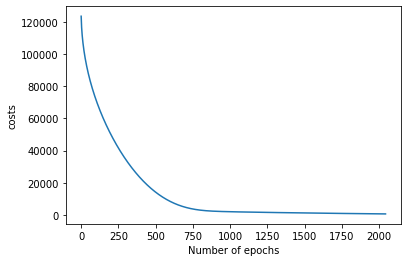

In [142]:
epochsr = range(0,len(costsr))
print(np.shape(epochsr))
print(np.shape(costsr))
plt.xlabel("Number of epochs")
plt.ylabel("costs")
plt.plot(epochsr,costsr)
plt.show()

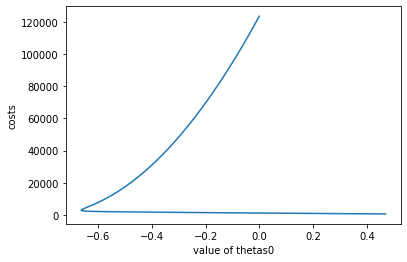

In [143]:
plt.plot(theta_0r,costsr)
plt.xlabel("value of thetas0")
plt.ylabel("costs")
plt.show()

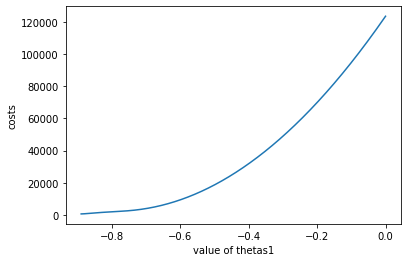

In [144]:
plt.plot(theta_1r,costsr)
plt.xlabel("value of thetas1")
plt.ylabel("costs")
plt.show()

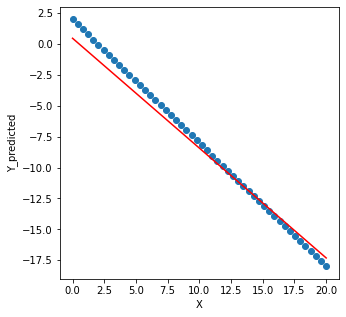

In [145]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X_data,predictionsr[-1] , 'r')
plt.xlabel('X')
plt.ylabel('Y_predicted')
plt.scatter(X_data,Y_data)
plt.show()


## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

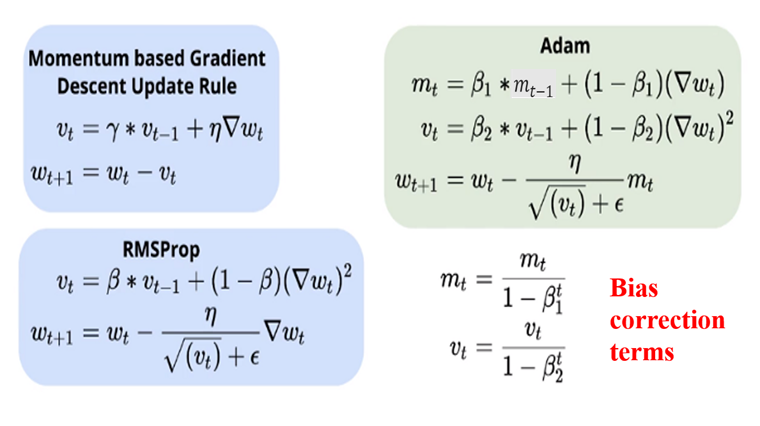

In [146]:
def Adam(X,Y,alpha,epsilon,beta1,beta2,epochs,eps):
    theta0=0
    theta1=0
    cost=[]
    th0=[]
    th1=[]
    gr1=[]
    gr2=[]
    allpredictions=[]
    v_0=0
    v_1=0
    mt_0=0
    mt_1=0
    mt1=mt0=vt0=vt1=0.0
   
    for i in range(iters):
        th0.append(theta0)
        th1.append(theta1)
        yper=theta0+theta1*X
        allpredictions.append(yper)
        t=np.sum(np.power(yper-Y,2))/2*len(X)
        cost.append(t)
        g1=np.sum(yper-Y)/len(X)
        g2=np.sum((yper-Y)*X)/len(X)
        mt_0=mt_0*beta1+(1-beta1)*g1
        mt_1=mt_1*beta1+(1-beta1)*g2
        v_0=v_0*beta2+(1-beta2)*(g1**2)
        v_1=v_1*beta2+(1-beta2)*(g2**2)
        gr1.append(g1)
        gr2.append(g2)
        mt0=mt_0/(1-beta1)
        mt1=mt_1/(1-beta1)
        # bias-corrected second moment
        vt0=v_0/(1-beta2)
        vt1=v_1/(1-beta2)
        theta0=theta0-(alpha/(np.sqrt(vt0+epsilon)))*mt0
        theta1=theta1-(alpha/(np.sqrt(vt1+epsilon)))*mt1
        grad=[gr1,gr2]
        gnorm = np.linalg.norm(grad)
        if i>1:
            if(gnorm<eps):
                return th0,th1,cost,allpredictions
            elif abs(cost[i-1]-cost[i])<=.5:
                return th0,th1,cost,allpredictions
    return th0,th1,cost,allpredictions

         

In [147]:
alpha=.001
iters=3000
e=1e-8
beta1=.99
beta2=.9
theta_0a,theta_1a,costsa,predictionsa=Adam(X_data,Y_data,alpha,e,beta1,beta2,iters,1e-3)


In [148]:
r2_score(Y_data,predictionsa[-1])

0.9999165994121574

(1976,)
(1976,)


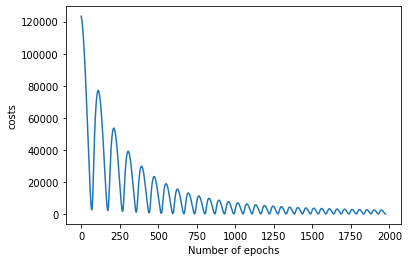

In [149]:
epochsa= range(0,len(costsa))
print(np.shape(epochsa))
print(np.shape(costsa))
plt.xlabel("Number of epochs")
plt.ylabel("costs")
plt.plot(epochsa,costsa)
plt.show()

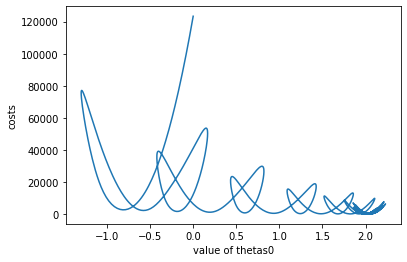

In [150]:
plt.plot(theta_0a,costsa)
plt.xlabel("value of thetas0")
plt.ylabel("costs")
plt.show()

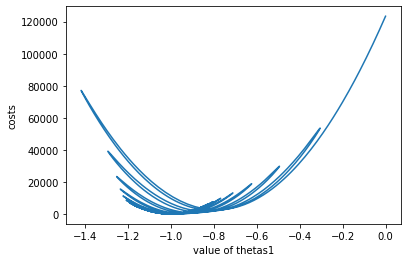

In [151]:
plt.plot(theta_1a,costsa)
plt.xlabel("value of thetas1")
plt.ylabel("costs")
plt.show()

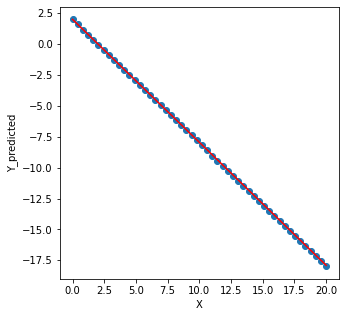

In [152]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(X_data,predictionsa[-1] , 'r')
plt.xlabel('X')
plt.ylabel('Y_predicted')
plt.scatter(X_data,Y_data)
plt.show()


## Congratulations 
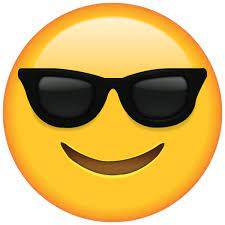